In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import TensorBoard

In [2]:
#Carregar o conjunto de dados Fashion MNIST
(X_treino, y_treino), (X_teste, y_teste) = fashion_mnist.load_data()


In [3]:
#Configurar o TensorBoard
logdir = 'logs/scalars/' + datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = TensorBoard(log_dir=logdir)

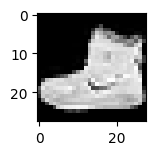

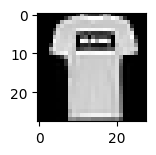

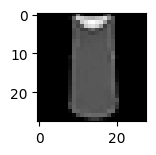

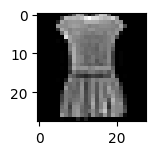

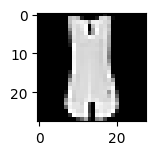

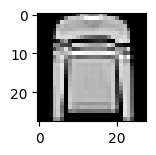

In [4]:
#Exibir exemplos de imagens do conjunto de treinamento
for x in range(6):
    plt.subplot(330 + 1 + x)
    plt.imshow(X_treino[x], cmap=plt.get_cmap('gray'))
    plt.show()

In [5]:
#Pré-processar os dados
X_treino = X_treino.astype('float32') / 255
X_teste = X_teste.astype('float32') / 255

X_treino = np.expand_dims(X_treino, -1)
X_teste = np.expand_dims(X_teste, -1)

In [6]:

#Imprimir as dimensões dos dados
print('Dimensão X_treino:', X_treino.shape)
print('Amostras de treino:', X_treino.shape[0])
print('Amostras de teste:', X_teste.shape[0])


Dimensão X_treino: (60000, 28, 28, 1)
Amostras de treino: 60000
Amostras de teste: 10000


In [7]:
#Converter os rótulos para categoricais
num_classes = 10
y_treino = to_categorical(y_treino, num_classes)
y_teste = to_categorical(y_teste, num_classes)


In [8]:
#Criar o modelo
dimensoes_entrada = (28, 28, 1)
modelo = Sequential([
Conv2D(32, kernel_size=(3, 3), activation="tanh", input_shape=dimensoes_entrada),
MaxPooling2D(pool_size=(2, 2)),
Conv2D(64, kernel_size=(3, 3), activation="tanh"),
MaxPooling2D(pool_size=(2, 2)),
Flatten(),
Dropout(0.5),
Dense(num_classes, activation="softmax")
])

print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [9]:
#Compilar e treinar o modelo
tamanho_lote = 64
epocas = 10
modelo.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
historico_treinamento = modelo.fit(X_treino, y_treino, batch_size=tamanho_lote, epochs=epocas,
validation_split=0.1, callbacks=[tensorboard_callback])


Epoch 1/10
844/844 [==============================] - 43s 49ms/step - loss: 1.0888 - accuracy: 0.6231 - val_loss: 0.6672 - val_accuracy: 0.7518
Epoch 2/10
844/844 [==============================] - 41s 49ms/step - loss: 0.6753 - accuracy: 0.7514 - val_loss: 0.5695 - val_accuracy: 0.7845
Epoch 3/10
844/844 [==============================] - 41s 49ms/step - loss: 0.5964 - accuracy: 0.7834 - val_loss: 0.5199 - val_accuracy: 0.8032
Epoch 4/10
844/844 [==============================] - 42s 49ms/step - loss: 0.5512 - accuracy: 0.7982 - val_loss: 0.4916 - val_accuracy: 0.8205
Epoch 5/10
844/844 [==============================] - 41s 49ms/step - loss: 0.5206 - accuracy: 0.8104 - val_loss: 0.4689 - val_accuracy: 0.8318
Epoch 6/10
844/844 [==============================] - 36s 43ms/step - loss: 0.4993 - accuracy: 0.8194 - val_loss: 0.4535 - val_accuracy: 0.8367
Epoch 7/10
844/844 [==============================] - 42s 49ms/step - loss: 0.4835 - accuracy: 0.8254 - val_loss: 0.4390 - val_accuracy:

In [10]:
#Avaliar o modelo
resultado = modelo.evaluate(X_teste, y_teste, verbose=0)
print('Erro no teste:', round(resultado[0], 5))
print('Acurácia no teste:', round(resultado[1], 5))


Erro no teste: 0.43646
Acurácia no teste: 0.8424


In [11]:
# Inicializar o TensorBoard
%load_ext tensorboard
%tensorboard --logdir {logdir}
#http://localhost:6006/